<a href="https://colab.research.google.com/github/geoifg/ssc_araguaia/blob/main/Estimativa_CSS_Araguaia_an%C3%A1lise_explorat%C3%B3ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Práticas de regressão de dados para estimativa de Concentração de Sedimentos em Suspensão no Rio Araguaia**

Material: Édipo Cremon (IFG)
Dados: https://doi.org/10.1080/2150704X.2019.1681597

Nesse script iremos utilizar a linguagem de programação R dentro do ambiente Colab que nativamente é para Python.

Ativar o emulador R magic

In [1]:
# activate R magic
%load_ext rpy2.ipython

Toda vez que for rodar um script em R, é necessário colocar o comando: %%R

In [2]:
#Teste
%%R
x <- 42
print(x)

[1] 42


In [3]:
#Pacotes instalados
%%R
str(allPackage <- installed.packages())
allPackage [, c(1,3:5)]

 chr [1:158, 1:16] "IRdisplay" "IRkernel" "pbdZMQ" "repr" "askpass" ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:158] "IRdisplay" "IRkernel" "pbdZMQ" "repr" ...
  ..$ : chr [1:16] "Package" "LibPath" "Version" "Priority" ...
              Package         Version    Priority     
IRdisplay     "IRdisplay"     "1.1"      NA           
IRkernel      "IRkernel"      "1.3"      NA           
pbdZMQ        "pbdZMQ"        "0.3-7"    NA           
repr          "repr"          "1.1.4"    NA           
askpass       "askpass"       "1.1"      NA           
assertthat    "assertthat"    "0.2.1"    NA           
backports     "backports"     "1.4.1"    NA           
base64enc     "base64enc"     "0.1-3"    NA           
bit           "bit"           "4.0.4"    NA           
bit64         "bit64"         "4.0.5"    NA           
blob          "blob"          "1.2.3"    NA           
brew          "brew"          "1.0-7"    NA           
brio          "brio"          "1.1.3"    NA          

In [4]:
#%%R
#library()

Aqui iremos ler os arquivos que estão em uma planilha no formato .csv que consta a reflectância ToA (top of atmosphere) das bandas espectrais do TM/Landsat, razões de banda e a concentração de sedimentos em suspensão.

In [5]:
%%R
araguaia_ToA<-read.csv('https://raw.githubusercontent.com/geoifg/ssc_araguaia/main/TOA_Araguaia.csv', header = T, sep = ';')
str(araguaia_ToA)

'data.frame':	68 obs. of  18 variables:
 $ Station          : chr  "Araguaiana" "Araguaiana" "Araguaiana" "Araguaiana" ...
 $ Station_cat      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Sample_date      : chr  "18/06/1994" "30/06/1997" "29/06/1998" "05/10/2004" ...
 $ Dif              : int  -6 6 -6 1 -1 1 -6 -6 7 7 ...
 $ Image_date       : chr  "12/06/1994" "06/07/1997" "23/06/1998" "06/10/2004" ...
 $ SSC              : num  26.4 73.3 31.2 20.7 179.9 ...
 $ B1               : num  0.0915 0.0977 0.1009 0.1025 0.0955 ...
 $ B2               : num  0.0836 0.0947 0.0949 0.0976 0.1009 ...
 $ B3               : num  0.0743 0.087 0.0754 0.0834 0.1123 ...
 $ B4               : num  0.0455 0.0449 0.0431 0.0475 0.0649 ...
 $ B5               : num  0.01476 0.01303 0.01419 0.01622 0.00816 ...
 $ B4.3by2.1        : num  0.684 0.686 0.605 0.654 0.902 ...
 $ B3_B1            : num  0.812 0.891 0.747 0.814 1.175 ...
 $ B2_B1            : num  0.914 0.969 0.941 0.952 1.056 ...
 $ B3_B2            : num  0.8

Transformar dados - o comando str indica que algumas colunas ficaram no formato character (chr)

In [8]:
%%R
#converter coluna tipo de dado em date 
#criar nova coluna de data
araguaia_ToA$Sample_date<-as.Date(araguaia_ToA$Sample_date, "%d/%m/%Y")
head(araguaia_ToA)

araguaia_ToA$Image_date<-as.Date(araguaia_ToA$Image_date, "%d/%m/%Y")
str(araguaia_ToA)

'data.frame':	68 obs. of  18 variables:
 $ Station          : chr  "Araguaiana" "Araguaiana" "Araguaiana" "Araguaiana" ...
 $ Station_cat      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Sample_date      : Date, format: "1994-06-18" "1997-06-30" ...
 $ Dif              : int  -6 6 -6 1 -1 1 -6 -6 7 7 ...
 $ Image_date       : Date, format: "1994-06-12" "1997-07-06" ...
 $ SSC              : num  26.4 73.3 31.2 20.7 179.9 ...
 $ B1               : num  0.0915 0.0977 0.1009 0.1025 0.0955 ...
 $ B2               : num  0.0836 0.0947 0.0949 0.0976 0.1009 ...
 $ B3               : num  0.0743 0.087 0.0754 0.0834 0.1123 ...
 $ B4               : num  0.0455 0.0449 0.0431 0.0475 0.0649 ...
 $ B5               : num  0.01476 0.01303 0.01419 0.01622 0.00816 ...
 $ B4.3by2.1        : num  0.684 0.686 0.605 0.654 0.902 ...
 $ B3_B1            : num  0.812 0.891 0.747 0.814 1.175 ...
 $ B2_B1            : num  0.914 0.969 0.941 0.952 1.056 ...
 $ B3_B2            : num  0.889 0.919 0.794 0.855 1.112 ...
 $ 

In [9]:
%%R
#converter a coluna Station_cat para factor (dado categórico)
araguaia_ToA$Station_cat <-as.factor(araguaia_ToA$Station_cat)
str(araguaia_ToA)

'data.frame':	68 obs. of  18 variables:
 $ Station          : chr  "Araguaiana" "Araguaiana" "Araguaiana" "Araguaiana" ...
 $ Station_cat      : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ Sample_date      : Date, format: "1994-06-18" "1997-06-30" ...
 $ Dif              : int  -6 6 -6 1 -1 1 -6 -6 7 7 ...
 $ Image_date       : Date, format: "1994-06-12" "1997-07-06" ...
 $ SSC              : num  26.4 73.3 31.2 20.7 179.9 ...
 $ B1               : num  0.0915 0.0977 0.1009 0.1025 0.0955 ...
 $ B2               : num  0.0836 0.0947 0.0949 0.0976 0.1009 ...
 $ B3               : num  0.0743 0.087 0.0754 0.0834 0.1123 ...
 $ B4               : num  0.0455 0.0449 0.0431 0.0475 0.0649 ...
 $ B5               : num  0.01476 0.01303 0.01419 0.01622 0.00816 ...
 $ B4.3by2.1        : num  0.684 0.686 0.605 0.654 0.902 ...
 $ B3_B1            : num  0.812 0.891 0.747 0.814 1.175 ...
 $ B2_B1            : num  0.914 0.969 0.941 0.952 1.056 ...
 $ B3_B2            : num  0.889 0.919 0.

In [10]:
%%R

#Para plotar uma estatística básica sobre os dados, podemos usar o comando summary()
summary(araguaia_ToA)


   Station          Station_cat  Sample_date              Dif         
 Length:68          0:39        Min.   :1992-08-04   Min.   :-7.0000  
 Class :character   1:29        1st Qu.:2003-04-09   1st Qu.:-3.0000  
 Mode  :character               Median :2007-01-31   Median : 1.0000  
                                Mean   :2005-11-15   Mean   : 0.7206  
                                3rd Qu.:2008-12-04   3rd Qu.: 4.0000  
                                Max.   :2011-10-13   Max.   : 8.0000  
   Image_date              SSC               B1                B2         
 Min.   :1992-08-02   Min.   :  4.42   Min.   :0.08388   Min.   :0.06654  
 1st Qu.:2003-04-07   1st Qu.: 15.26   1st Qu.:0.09549   1st Qu.:0.09253  
 Median :2007-02-01   Median : 26.13   Median :0.10346   Median :0.09849  
 Mean   :2005-11-16   Mean   : 46.52   Mean   :0.11240   Mean   :0.10605  
 3rd Qu.:2008-12-04   3rd Qu.: 51.79   3rd Qu.:0.12240   3rd Qu.:0.11578  
 Max.   :2011-10-10   Max.   :217.16   Max.   :0.1919

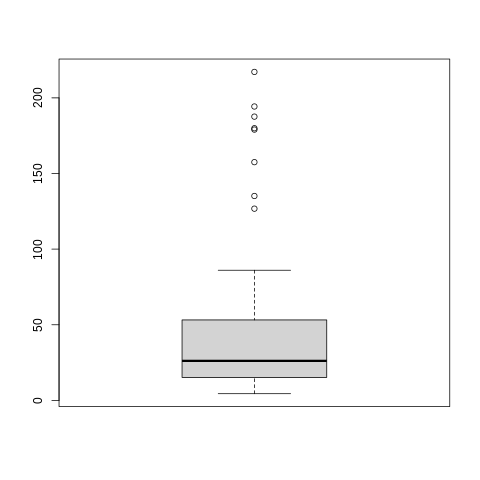

In [11]:
#Para gerar uma gráfico de boxplot de uma variável espercífica do data frame, usamos $
%%R
boxplot(araguaia_ToA$SSC)

 [1] "Station"           "Station_cat"       "Sample_date"      
 [4] "Dif"               "Image_date"        "SSC"              
 [7] "B1"                "B2"                "B3"               
[10] "B4"                "B5"                "B4.3by2.1"        
[13] "B3_B1"             "B2_B1"             "B3_B2"            
[16] "B4_B3"             "B3_B2.B1"          "B3.B2.B1_B3.B2.B1"


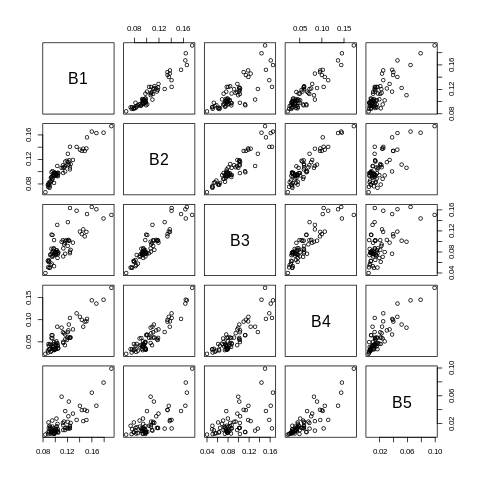

In [12]:
#Para gerar uma matriz de gr?ficos de dispers?o entre as vari?veis do data.frame podemos usar o comando pairs()
%%R
pairs(araguaia_ToA[c("B1", "B2", "B3", "B4", "B5")])
names(araguaia_ToA)

Trabalhando com pacotes
Instalando o pacote "corrplot"

(as ‘lib’ is unspecified)







	‘/tmp/RtmpUDGZLt/downloaded_packages’




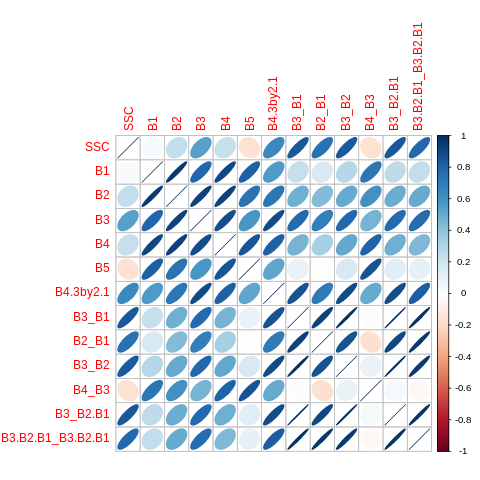

In [13]:
%%R
install.packages("corrplot")

#Chamando o pacote "corrplot"
library(corrplot)

# primeiro fazemos a matriz de correla??o
M <- cor(araguaia_ToA[6:18])
M
corrplot(M, method = "ellipse")



```
# Isto está formatado como código
```

Outra representação (exemplo 2)

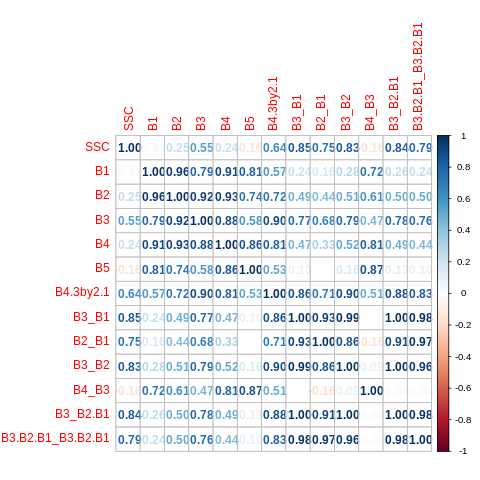

In [ ]:
%%R
corrplot(M, method = "number")

Mais uma representação (exemplo 3)

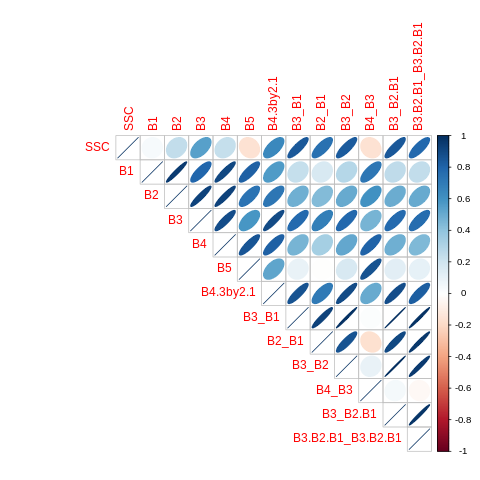

In [ ]:
%%R
corrplot(M, method = "ellipse", type = "upper")

Vamos para outra representação (exemplo 4)






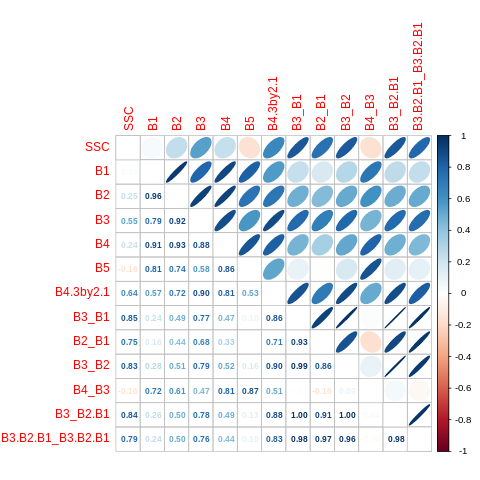

In [ ]:
%%R
corrplot.mixed(M, lower = "number", number.cex = .7, upper = "ellipse", tl.pos = "lt")

Última representação por hoje (exemplo 5)

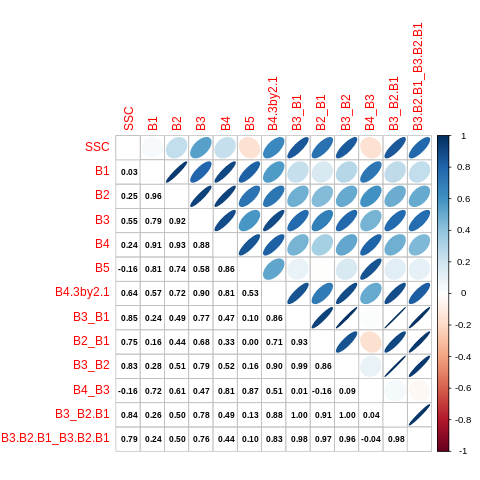

In [14]:
%%R
corrplot.mixed(M, lower = "number", lower.col = "black", number.cex = .7, upper = "ellipse", tl.pos = "lt")

Obter uma regressão linear no R

In [15]:
%%R
regressao <- lm (SSC~B3_B1, data=araguaia_ToA)
#Parametros da regressao
print(regressao)
summary(regressao)


Call:
lm(formula = SSC ~ B3_B1, data = araguaia_ToA)

Coefficients:
(Intercept)        B3_B1  
     -159.3        254.1  


Call:
lm(formula = SSC ~ B3_B1, data = araguaia_ToA)

Residuals:
    Min      1Q  Median      3Q     Max 
-55.664 -19.274  -3.069  15.572 110.647 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -159.32      16.30  -9.772 1.89e-14 ***
B3_B1         254.14      19.71  12.895  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 27.36 on 66 degrees of freedom
Multiple R-squared:  0.7159,	Adjusted R-squared:  0.7116 
F-statistic: 166.3 on 1 and 66 DF,  p-value: < 2.2e-16



Vamos analisas os resíduos desta regressão simples

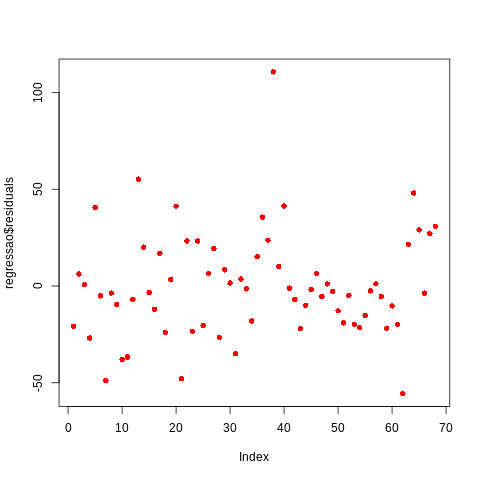

In [16]:
%%R
plot(regressao$residuals, pch = 16, col = "red")


Um dos pressupostos é que a soma dos resíduos seja igual a zero.

In [17]:
%%R
sum(regressao$residuals)

[1] 5.107026e-15


Um dos grandes potenciais do R ? a parte de an?lise estat?stica
Na regressão parte-se do pressuposto que os residuos (erro) tenham normalidade
Vamos fazer um teste estatistico de normalidade nos residuos
Usaremos o teste Shapiro-Wilk

In [18]:
%%R
shapiro.test(regressao$residuals)


	Shapiro-Wilk normality test

data:  regressao$residuals
W = 0.94332, p-value = 0.003884



Nesse teste, o p-valor for < 0.05 indica que os dados não apresentam normalidade.


Gráfico entre a razão de banda e a concentração de sedimentos em suspensão

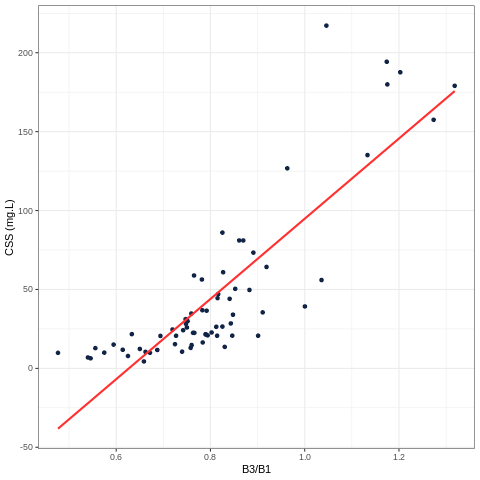

In [19]:
%%R
#Grafico entre preco e area dos imoveis
library(ggplot2)
ggplot(araguaia_ToA) +
  aes(x = B3_B1, y = SSC) +
  geom_point(shape = "circle", size = 1.5, colour = "#112446") +
  theme_bw() +
  geom_smooth(formula=y~x,method=lm,
              col="firebrick1",se=FALSE) +
  labs(x = "B3/B1", y = "CSS (mg.L)") 
